# Indice
[torna all'indice](#Indice)  
[Historical data](#Historical_data)  
[Ciclo lat-lon](#ciclo_lat-lon_corretto_per_dati_storici)  
[Gamma fit](#Gamma_fit)  
[Gengamma fit](#Gengamma_fit)  
[Proiezioni](#proiezioni)

**Principi generali:**  

si guarda alla PDF data dalla funzione $\Gamma$ (anche generalizzata per migliorare il fit)


**pseudocode**  
apro i dataset  R20, RX1DAY  
apro il dataset del periodo di riferimento per R20 e RX1DAY  
calcolo $\mu$ e $\theta$  
il valore è dato da:
- aumento del valore R20 (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?
- aumento del valore R1XDAY (decidere se la $\mu$ o la $\theta$ della $\Gamma$), ovvero: la PDF cambia a favore di eventi estremi (poco, abbastanza, molto)?

Calcolo statistiche pr: devo considerare la statistica di precipitazione sull'intero periodo. Per la precipitazione giornaliera calcolo tutto, per la precipitazione intensa (R20) filtro sui giorni con almeno 20mm.  
La procedura è la stessa, i file sono gli stessi, cambiano i 2 periodi.  
Considero 4.5 e 8.5 o uno solo? Prima dovrei vedere qual è la situazione peggiore...

$$
f(x; k, \theta) = \frac{1}{\theta^k \cdot \Gamma(a)} \cdot x ^{k - 1} \cdot e^\left(-\frac{x}{\theta}\right)
$$


- $\theta$ is the scale paramet
- $\Gamma$ion

where:

- x is the daily precipitation (x>0)
- k is the shape parameter

$$
p (P) = A \cdot P ^  {-\tau _P} \cdot e ^ {- \frac{P}{P _L}}
$$

where:

$\tau{_P}$ (<1) is a power law exponent governing the rate of decay of the PDF  
P_L = $\theta$ can be regarded as a dailiy precipitation cutoff scale, where the pdf drops sharply

n

In order to improve data fitting it is possible to use a generalized gamma funcion for PDF:

$$
f(x; a, c, \theta, d) = \frac{c}{\theta^{(ca-1)} \cdot \Gamma(a)} \cdot \left( {{x-d}} \right)^{ca-1} \cdot \exp \left( - \left( \frac{x-d}{\theta} \right)^c \right)
$$
where: 

a: It is the shape parameter. It controls the shape of the distribution, influencing the distribution of data in the tail: for higher values the probability of high precipitatios is bigger (fat tail, more outliers).  
c: It is an additional shape parameter. This parameter provides more flexibility to the gamma distribution, allowing for a wider range of distribution shapes. The higher the value of a, the smaller the "weight" of the tail (and less outliers). If it is negative the decay is slower for high values of precipitation.     
$\theta$: It is the scale parameter. It controls the scale of the distribution, influencing the width of the distribution. Higher values of $\theta$ correspond to narrower distributions.  
d: It is the shift factor: it is influenced in the fit by the presence of minimum precipitation values. In the case of examining precipitation values greater than 1mm, it can be set to 1.

Is i

**Caso 2021-2040**  
NB: il file dei dati è unico

carico i file delle precipitazioni con i dati giornalieri: tengo separati gli 8 modelli per avere più statistica (oppure per calcolare l'ensemble e poi fare il calcolo sull'ensemble)

In [2]:
#inizializzazione librerie
import xarray as xr
import numpy as np
import netCDF4
from scipy.stats import gengamma
import pandas as pd

**Not working behind ARPA Firewall or proxy**

In [10]:
dataset_names=[]

In [11]:
#reload dataset names from file
with open('datasets.txt', 'r') as f:
    for line in f:
        name, link = line.strip().split(',')
        # add dataset name
        dataset_names.append(name)
        

In [12]:
dataset_names

['ARCIS_GG_1961-2015_LOMB.nc',
 'CLMcom_CCLM4-8-17_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'DMI_HIRHAM5_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'GERICS_REMO2015_NorESM1-M_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'KNMI_RACMO22E_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'MPI-CSC_REMO2009_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'SMHI_RCA4_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4',
 'SMHI_RCA4_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4']

In [13]:
file_indici=[]
file_indici = [os.path.join('work', name) for name in dataset_names]

# Ora hai un array con i nomi dei dataset e un array con i file_indici
print("Nomi dei dataset:", dataset_names)
print("File indici:", file_indici)

Nomi dei dataset: ['ARCIS_GG_1961-2015_LOMB.nc', 'CLMcom_CCLM4-8-17_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'DMI_HIRHAM5_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'GERICS_REMO2015_NorESM1-M_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'KNMI_RACMO22E_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'MPI-CSC_REMO2009_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'SMHI_RCA4_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'SMHI_RCA4_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4']
File indici: ['work/ARCIS_GG_1961-2015_LOMB.nc', 'work/CLMcom_CCLM4-8-17_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'work/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'work/DMI_HIRHAM5_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'work/GERICS_REMO2015_NorESM1-M_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4', 'work/KNMI_RACMO22E_HadGEM2-ES_rcp8.5_2016-2065_BASD_

# Historical_data

## PDF as a whole

10956
10956
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... Fal

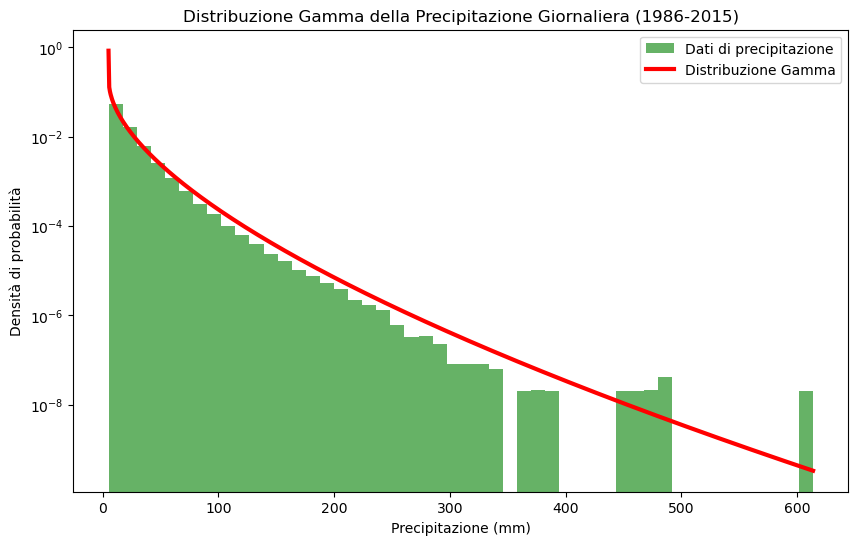

In [14]:
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'rr'
variable='rr'
precipitation = ds[variable]
precipitation_to_go=[]
# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

cutoff=5

# Assumendo che i dati di precipitazione siano in mm/giorno
# Filtrare per i valori maggiori di zero per la distribuzione Gamma
precipitation_to_go = precipitation_filtered.values
print(len(precipitation_to_go))
precipitation_positive_nan = np.where(precipitation_to_go > cutoff, precipitation_to_go, np.nan)
print(len(precipitation_positive_nan))

# Trova gli indici dei valori non NaN in precipitation_positive_nan
indici_non_nan = ~np.isnan(precipitation_positive_nan)
print((indici_non_nan))
# Seleziona solo i valori non NaN utilizzando gli indici trovati
precipitation_positive = precipitation_positive_nan[indici_non_nan]
Num=np.sum(indici_non_nan)
print(Num,len(precipitation_positive))

# Calcolare i parametri della distribuzione Gamma
params_gengamma = gengamma.fit(precipitation_positive)

print(f'Generalized Gamma Fit:\nParams: {params_gengamma}')
# Plot della distribuzione
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Istogramma dei dati di precipitazione giornaliera
ax.hist(precipitation_positive, bins=50, density=True, alpha=0.6, color='g', label='Dati di precipitazione')

# Valori della distribuzione gamma
x = np.linspace(precipitation_positive.min(), precipitation_positive.max(), 1000)
pdf_fitted = gengamma.pdf(x, *params_gengamma)

# Plot della distribuzione Gamma
ax.plot(x, pdf_fitted, 'r-', lw=3, label='Distribuzione Gamma')
ax.set_title('Distribuzione Gamma della Precipitazione Giornaliera (1986-2015)')
ax.set_xlabel('Precipitazione (mm)')
ax.set_ylabel('Densità di probabilità')
ax.set_yscale('log')  # Imposta la scala y come logaritmica
ax.legend()

plt.show()

# Chiudi il dataset
ds.close()


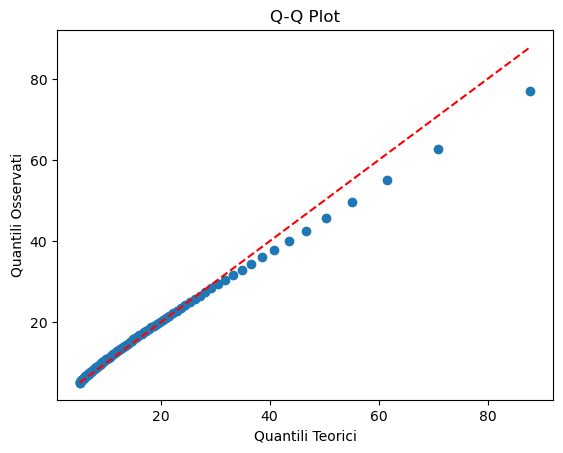

In [15]:
#Q-Q plot
# Calcola i quantili teorici
quantiles = np.linspace(0.01, 0.99, 100)

# Genera i quantili fittati dalla distribuzione
fitted_quantiles = gengamma.ppf(quantiles, *params_gengamma)

# Crea il Q-Q plot
plt.plot(fitted_quantiles, np.percentile(precipitation_positive, quantiles*100), 'o')
plt.plot([min(fitted_quantiles), max(fitted_quantiles)], [min(fitted_quantiles), max(fitted_quantiles)], 'r--')
plt.xlabel('Quantili Teorici')
plt.ylabel('Quantili Osservati')
plt.title('Q-Q Plot')
plt.show()

In [73]:
# Test goodness of fit
import numpy as np
from scipy.stats import cramervonmises, gengamma
import scipy.stats as stats

dati_validi=precipitation_positive

# Estrai i parametri
a, c, loc, scale = params_gengamma

# Test di Shapiro-Wilk sui residui (dovrebbero essere normali)
residui = dati_validi - stats.gengamma.ppf(np.linspace(0, 1, len(dati_validi)), a, c, loc=loc, scale=scale)
shapiro_test = stats.shapiro(residui)

print(f"Test di Shapiro-Wilk sui residui: p-value = {shapiro_test.pvalue:.4f}")


Test di Shapiro-Wilk sui residui: p-value = 1.0000


# ciclo_lat-lon_corretto_per_dati_storici  
[torna all'indice](#Indice)  
**ATTENZIONE!** viene salvato tutto in un dictionary

## Gamma_fit
PDF plots only for precipitation extremes

NameError: name 'dataset_names' is not defined

## Gengamma_fit
[torna all'indice](#Indice)  

## Fase 1: calcolo del dato storico
Viene direttamente fatto il ciclo su tutte le celle del dataset storico

In [16]:
def calcola_r2_gengamma(dati_obs, params_gengamma):
    """
    Calcola l'indice di correlazione R^2 per il fit della Generalized Gamma.
    
    dati_obs: array dei valori osservati
    params_gengamma: parametri della distribuzione Generalized Gamma
    """
    a, c, loc, scale = params_gengamma  # Scompatta i parametri
    
    # Ordina i dati osservati
    dati_obs_sorted = np.sort(dati_obs)
    
    # Genera i quantili teorici previsti dal modello
    quantili_teorici = gengamma.ppf(np.linspace(0.01, 0.99, len(dati_obs_sorted)), a, c, loc, scale)

    # Calcola la media dei dati osservati
    mean_obs = np.mean(dati_obs_sorted)

    # Calcola R^2
    ss_res = np.sum((dati_obs_sorted - quantili_teorici) ** 2)  # Somma dei residui al quadrato
    ss_tot = np.sum((dati_obs_sorted - mean_obs) ** 2)  # Somma totale dei quadrati
    
    r2 = 1 - (ss_res / ss_tot)
    
    return r2

In [17]:
# salva il fit dei parametri storici in un file NetCDF


def save_fit_to_netcdf(parametri_fit_dict, filename):
    """
    Salva i parametri del fit in un file NetCDF.
    
    Args:
        parametri_fit_dict (dict): Dizionario con i parametri del fit, con chiavi (lat_idx, lon_idx).
        filename (str): Nome del file NetCDF di output.
    """
    # Converti il dizionario in liste di dati
    lat_list = []
    lon_list = []
    a_list = []
    c_list = []
    loc_list = []
    scale_list = []
    mean_list = []
    devst_list = []
    R2_list = []
    num_elements_list = []

    # Estrai i dati dal dizionario
    for (lat_idx, lon_idx), values in parametri_fit_dict.items():
        lat_list.append(values['lat'])  # Legge la latitudine effettiva
        lon_list.append(values['lon'])  # Legge la longitudine effettiva
        a_list.append(values['a'])
        c_list.append(values['c'])
        loc_list.append(values['loc'])
        scale_list.append(values['scale'])
        mean_list.append(values['mean'])
        devst_list.append(values['devst'])
        R2_list.append(values['R2'])
        num_elements_list.append(values['num_elements'])

    # Creare coordinate uniche per latitudine e longitudine
    lat_coords = np.unique(lat_list)
    lon_coords = np.unique(lon_list)

    # Creare una griglia 2D di lat x lon per le variabili
    a_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    c_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    loc_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    scale_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    mean_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    devst_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    R2_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)
    num_elements_matrix = np.full((len(lat_coords), len(lon_coords)), np.nan)

    # Popolare le matrici con i dati
    for i, (lat, lon) in enumerate(zip(lat_list, lon_list)):
        lat_idx = np.where(lat_coords == lat)[0][0]
        lon_idx = np.where(lon_coords == lon)[0][0]
        
        a_matrix[lat_idx, lon_idx] = a_list[i]
        c_matrix[lat_idx, lon_idx] = c_list[i]
        loc_matrix[lat_idx, lon_idx] = loc_list[i]
        scale_matrix[lat_idx, lon_idx] = scale_list[i]
        mean_matrix[lat_idx, lon_idx] = mean_list[i]
        devst_matrix[lat_idx, lon_idx] = devst_list[i]
        R2_matrix[lat_idx, lon_idx] = R2_list[i]
        num_elements_matrix[lat_idx, lon_idx] = num_elements_list[i]

    # Creare dataset xarray
    ds = xr.Dataset(
        {
            "a": (["lat", "lon"], a_matrix),
            "c": (["lat", "lon"], c_matrix),
            "loc": (["lat", "lon"], loc_matrix),
            "scale": (["lat", "lon"], scale_matrix),
            "mean": (["lat", "lon"], mean_matrix),
            "devst": (["lat", "lon"], devst_matrix),
            "R2": (["lat", "lon"], R2_matrix),
            "num_elements": (["lat", "lon"], num_elements_matrix),
        },
        coords={
            "lat": lat_coords,
            "lon": lon_coords
        }
    )

    # Salva il file NetCDF
    ds.to_netcdf(filename)

    print(f"File NetCDF salvato correttamente come '{filename}' 🎉")

# Esempio di utilizzo:
# save_fit_to_netcdf(parametri_fit_dict, "gengamma_fit.nc")


In [18]:
#gengamma
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# Apri il file NetCDF usando xarray
file_path = file_indici[0]
ds = xr.open_dataset(file_path)

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'precipitation'
variable = 'rr'
precipitation = ds[variable]

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 1986-2015
mask = (dates >= '1986-01-01') & (dates <= '2015-12-31')
precipitation_filtered = precipitation.sel(time=mask)

# Numero di celle latitudine-longitudine
num_lat = len(precipitation_filtered['lat'])
num_lon = len(precipitation_filtered['lon'])

"""  Questo blocco è inutile, si usa direttamente scipy
# Definisci una funzione per calcolare media e varianza
def calcola_media_varianza_gengamma(params_gengamma):
    a = params_gengamma[0]
    c = params_gengamma[1]
    loc = params_gengamma[2]
    scale = params_gengamma[3]
    
    mean = loc + scale * (a / c)
    variance = scale**2 * (a / c**2)*(c+1)
    
    return mean, variance
"""
# Inizializza un dizionario per memorizzare i parametri del fit e altre informazioni
parametri_fit_dict = {}

# Per ciascuna cella latitudine-longitudine
for lat in range(num_lat):
    for lon in range(num_lon):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered[:, lat, lon]
        
        # Rimuovi i valori NaN e quelli inferiori a zero
        dati_validi = dati_cell[~np.isnan(dati_cell) & (dati_cell > 0.1)]
        num_elements=len(dati_validi)
        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            continue  # Salta la cella se ci sono meno di 30 osservazioni
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            parametri_fit = gengamma.fit(dati_validi)
            
            # Calcola media e varianza
            mean,variance=gengamma.mean(*parametri_fit),gengamma.var(*parametri_fit)

            #calcola R2
            R2=calcola_r2_gengamma(dati_validi,parametri_fit)
            
            # Aggiungi i parametri del fit e altre informazioni al dizionario
            parametri_fit_dict[(lat, lon)] = {
                'lat': float(precipitation_filtered['lat'][lat].values),
                'lon': float(precipitation_filtered['lon'][lon].values),
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'devst': np.sqrt(variance),
                'R2': R2,
                'num_elements': len(dati_validi)/len(dati_cell)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per la cella lat={lat}, lon={lon}: {e}")
            continue
        print(f"Cella lat={lat}, lon={lon} mean={mean} R2={R2}")
        P_80=1-gengamma.cdf(80,*parametri_fit)
        percentuale_sup_80 = (dati_validi > 80).sum() / len(dati_validi)
        #Q-Q plot
        # Calcola i quantili teorici
        quantiles = np.linspace(0.01, 0.99, 100)
        
        # Genera i quantili fittati dalla distribuzione
        fitted_quantiles = gengamma.ppf(quantiles, *parametri_fit)
        
        # `dati_validi` contiene i valori osservati
        # `params_fit` fit della gengamma per una specifica cella
        a, c, loc, scale = parametri_fit  # Decomposizione dei parametri
        
        # Calcola la CDF teorica della distribuzione adattata
        cdf_teorica = gengamma.cdf(np.sort(dati_validi), a, c, loc, scale)
        
        # Genera i quantili teorici attesi
        quantili_teorici = gengamma.ppf(cdf_teorica, a, c, loc, scale)
        
        # Calcola i residui come differenza tra dati e quantili attesi
        #residui = np.sort(dati_validi) - quantili_teorici
        residui = dati_validi - stats.gengamma.ppf(np.linspace(0.01, .99, len(dati_validi)), a, c, loc=loc, scale=scale)
        """  Blocco grafici fit goodness
        # Plot degli istogrammi dei residui
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.hist(residui, bins=30, edgecolor='black', alpha=0.7)
        plt.axvline(0, color='red', linestyle='dashed', linewidth=1.5)
        plt.xlabel("Residui (Osservati - Teorici)")
        plt.ylabel("Frequenza")
        plt.title("Istogramma dei Residui")
        
        # QQ-Plot
        plt.subplot(1, 2, 2)
        plt.scatter(quantili_teorici, np.sort(dati_validi), alpha=0.6)
        plt.plot(quantili_teorici, quantili_teorici, color="red", linestyle="dashed")  # Linea ideale 1:1
        plt.xlabel("Quantili teorici gengamma")
        plt.ylabel("Quantili osservati")
        plt.title("QQ-Plot")
        
        plt.tight_layout()
        plt.show()
       
        # Test di Shapiro-Wilk sui residui (dovrebbero essere normali)
        # Supponiamo che 'residui' sia il tuo array di residui
        n_sample = min(50, len(residui))  # Prende massimo 500 dati
        
        # Estrai un campione casuale senza sostituzione
        residui_sample = np.random.choice(residui, size=n_sample, replace=False)
        
        # Test di Shapiro-Wilk sul campione
        shapiro_test = stats.shapiro(residui_sample)
        print(f"Test di Shapiro-Wilk sul campione: p-value = {shapiro_test.pvalue:.4f}")       

        #Curtosi e asimmetria
        
        print("Asimmetria:", skew(residui),"Curtosi:", kurtosis(residui))
            
        if P_80 > 1e-3:
            print(f"  Media, varianza, N, P(80): {mean} {variance} {num_elements} {P_80}") 
        
            plt.figure(figsize=(10, 6))
            plt.hist(dati_validi, bins=30, density=True, alpha=0.6, color='g', label='Dati validi')
            
            x = np.linspace(mean/2, max(dati_validi), 100)
            pdf_fitted = gengamma.pdf(x, *parametri_fit)
            plt.plot(x, pdf_fitted, 'r-', label='Distribuzione Generalized Gamma fittata')
            
            plt.title(f'Fit della distribuzione Generalized Gamma per lat={lat}, lon={lon} P_80={P_80:.4f} {percentuale_sup_80:.4f}')
            plt.xlabel('Precipitazione (mm/giorno)')
            plt.ylabel('Densità di probabilità')
            plt.yscale('log')
            plt.legend()
            plt.grid(True)
            plt.show()
"""        

Cella lat=0, lon=0 mean=8.011758271487224 R2=0.9631616398848837
Cella lat=0, lon=1 mean=10.072967323061487 R2=0.8670714898486345
Cella lat=0, lon=2 mean=11.613978564057813 R2=0.6014960163555156
Cella lat=0, lon=3 mean=12.73301332692958 R2=0.1273918584923246
Cella lat=0, lon=4 mean=7.060369324471992 R2=0.876598421640024
Cella lat=0, lon=5 mean=7.139014247593066 R2=0.9540195929237658
Cella lat=0, lon=6 mean=6.8473200786342785 R2=0.9587431760489648
Cella lat=0, lon=7 mean=9.202183266548742 R2=0.9097616350829303
Cella lat=0, lon=8 mean=10.902249250109337 R2=0.7084937792253159
Cella lat=0, lon=9 mean=11.233235291320495 R2=0.7606344685465831
Cella lat=0, lon=10 mean=13.98847991941846 R2=0.28981567410826936
Cella lat=0, lon=11 mean=10.482550900479092 R2=0.8312431498776724
Cella lat=0, lon=12 mean=11.412076938708738 R2=0.8479334212537061
Cella lat=0, lon=13 mean=7.609563963434409 R2=0.8352395121885934
Cella lat=0, lon=14 mean=10.929593855721622 R2=0.8777186921811736
Cella lat=0, lon=15 mean=6.

In [19]:
save_fit_to_netcdf(parametri_fit_dict, "gengamma_fit_his.nc")

File NetCDF salvato correttamente come 'gengamma_fit_his.nc' 🎉


# proiezioni
[torna all'indice](#Indice)  

# caso_fit_proiezioni
*NOTA* i primi due sono spezzati perché nel caso non si ricarica il dataset delle proiezioni. Se il ciclo fallisce, ripartire solo dal ciclo **2**

In [21]:
#1
import xarray as xr
import numpy as np
from scipy.stats import gengamma
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Apri il file NetCDF usando xarray
datasets = []
for f in file_indici[1:]:
    print(f)
    datasets.append(f)
ds = xr.open_mfdataset(datasets, combine='nested', concat_dim='realization')
print('Dataset completo')

# Assumendo che i dati di precipitazione siano in una variabile chiamata 'pr'
variable = 'pr'
precipitation = ds[variable].compute()  # Forza il caricamento dei dati

# Convertire il tempo in date utilizzando xarray e pandas
dates = pd.to_datetime(precipitation['time'].values)

# Filtrare i dati per il periodo 2021-2040
mask = (dates >= '2021-01-01') & (dates <= '2040-12-31')
precipitation_filtered = precipitation.sel(time=mask)
print(precipitation_filtered)

# Ottieni i valori di latitudine e longitudine
lat_values = precipitation_filtered['lat'].values
lon_values = precipitation_filtered['lon'].values

work/CLMcom_CCLM4-8-17_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/CLMcom_CCLM4-8-17_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/DMI_HIRHAM5_EC-EARTH_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/GERICS_REMO2015_NorESM1-M_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/KNMI_RACMO22E_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/MPI-CSC_REMO2009_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/SMHI_RCA4_HadGEM2-ES_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
work/SMHI_RCA4_MPI-ESM-LR_rcp8.5_2016-2065_BASD_ARCIS_daily_pr.nc4
Dataset completo
<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45, lon: 59)> Size: 621MB
array([[[[ 0.        ,  0.        ,  0.        , ...,  1.255571  ,
           1.1218135 ,  1.0744437 ],
         [ 0.        ,  0.        ,  0.        , ...,  1.2725209 ,
           1.1693106 ,  1.0663491 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.74574476,
           0.9740872 ,  1.3097607 ],
         ...,
        

In [22]:
#2

# Inizializza un dizionario per memorizzare i parametri del fit
parametri_fit_dict_proj = {}

print('Inizio ciclo')
# Per ciascuna cella latitudine-longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index).compute()
        
        # Filtra i valori > 0 e non NaN
        filtered_data = dati_cell.where(dati_cell > 0, drop=True).values
        filtered_values = filtered_data.flatten()
        filtered_values = filtered_values[np.isfinite(filtered_values)]
        
        # Conta i valori non NaN e > 0
        num_elements = len(filtered_values)
        print(lat_index, lon_index, num_elements)

        # Controlla se ci sono abbastanza dati validi
        if num_elements < 30:
            print('<30 osservazioni, salto cella')
            continue
        
        # Esegui il fit della distribuzione Generalized Gamma
        try:
            print('Elaborazione fit...')
            if len(filtered_values) == 0:
                print(f"Nessun valore valido per {lat_values[lat_index]}, {lon_values[lon_index]}. Salto il fit.")
                continue
            
            # Fit della Generalized Gamma     
            parametri_fit = gengamma.fit(filtered_values)
          
            # Calcola media e varianza
            mean = gengamma.mean(*parametri_fit)
            variance = gengamma.var(*parametri_fit)
            
            #calcola R2
            R2=calcola_r2_gengamma(filtered_values,parametri_fit)
            
            # Memorizza i risultati nel dizionario
            lat, lon = lat_values[lat_index], lon_values[lon_index]
            parametri_fit_dict_proj[(lat_index, lon_index)] = {
                'lat': float(lat),   # Usa direttamente lat_values
                'lon': float(lon),   # Usa direttamente lon_value
                'a'  : parametri_fit[0],
                'c'  : parametri_fit[1],
                'loc': parametri_fit[2],
                'scale': parametri_fit[3],
                'mean': mean,
                'devst': np.sqrt(variance),
                'R2': R2,
                'num_elements': num_elements/len(dati_cell)
            }
        
        except Exception as e:
            print(f"Errore nel fit dei dati per ({lat_values[lat_index]}, {lon_values[lon_index]}): {e}")
            continue
"""
        # Grafico di verifica del fit
        a, c, loc, scale = parametri_fit
        dati_validi = filtered_values
        cdf_teorica = gengamma.cdf(np.sort(dati_validi), a, c, loc, scale)
        quantili_teorici = gengamma.ppf(cdf_teorica, a, c, loc, scale)
        residui = dati_validi - stats.gengamma.ppf(np.linspace(0.01, .99, len(dati_validi)), a, c, loc=loc, scale=scale)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.hist(residui, bins=30, edgecolor='black', alpha=0.7)
        plt.axvline(0, color='red', linestyle='dashed', linewidth=1.5)
        plt.xlabel("Residui (Osservati - Teorici)")
        plt.ylabel("Frequenza")
        plt.title("Istogramma dei Residui")

        plt.subplot(1, 2, 2)
        plt.scatter(quantili_teorici, np.sort(dati_validi), alpha=0.6)
        plt.plot(quantili_teorici, quantili_teorici, color="red", linestyle="dashed")
        plt.xlabel("Quantili teorici gengamma")
        plt.ylabel("Quantili osservati")
        plt.title("QQ-Plot")
        plt.tight_layout()
        plt.show()

        P_80 = 1 - gengamma.cdf(80, *parametri_fit)
        perc = num_elements / len(dati_cell) * 100

        if P_80 > 1e-5:
            print(f"Cella lat={lat_index}, lon={lon_index}")
            print(f"  Media: {mean:.4f}, Varianza: {variance:.4f}, N: {num_elements}, P(80): {P_80:.4f}")
"""
# Salva su file NetCDF

save_fit_to_netcdf(parametri_fit_dict_proj, 'gengamma_fit_proj.nc')


Inizio ciclo
0 0 13810
Elaborazione fit...
0 1 13637
Elaborazione fit...
0 2 12521
Elaborazione fit...
0 3 13426
Elaborazione fit...
0 4 13943
Elaborazione fit...
0 5 13886
Elaborazione fit...
0 6 15149
Elaborazione fit...
0 7 14604
Elaborazione fit...
0 8 14719
Elaborazione fit...
0 9 13540
Elaborazione fit...
0 10 14258
Elaborazione fit...
0 11 14885
Elaborazione fit...
0 12 14933
Elaborazione fit...
0 13 15049
Elaborazione fit...
0 14 16569
Elaborazione fit...
0 15 17832
Elaborazione fit...
0 16 18833
Elaborazione fit...
0 17 19683
Elaborazione fit...
0 18 20392
Elaborazione fit...
0 19 18395
Elaborazione fit...
0 20 21736
Elaborazione fit...
0 21 22865
Elaborazione fit...
0 22 25383
Elaborazione fit...
0 23 24046
Elaborazione fit...
0 24 23359
Elaborazione fit...
0 25 23366
Elaborazione fit...
0 26 22875
Elaborazione fit...
0 27 21786
Elaborazione fit...
0 28 24169
Elaborazione fit...
0 29 23023
Elaborazione fit...
0 30 22521
Elaborazione fit...
0 31 19660
Elaborazione fit...
0 32 

In [18]:
#controllo su ds
ds

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 59, lat: 45, time: 18263, realization: 8)
Coordinates:
  * lon      (lon) float64 472B 7.841 7.904 7.967 8.03 ... 11.37 11.43 11.5
  * lat      (lat) float64 360B 44.66 44.7 44.74 44.79 ... 46.55 46.59 46.63
  * time     (time) datetime64[ns] 146kB 2016-01-01 2016-01-02 ... 2065-12-31
Dimensions without coordinates: realization
Data variables:
    pr       (realization, time, lat, lon) float32 2GB dask.array<chunksize=(1, 6088, 15, 20), meta=np.ndarray>
Attributes:
    dataset:      /home/jovyan/shared/Climate4R_script/ARCIS/ARCIS_GG_1961-20...
    Origin:       NetCDF file created by loadeR.2nc: https://github.com/Santa...
    Conventions:  CF-1.4

In [19]:
lat_values,lon_values

(array([44.655, 44.7  , 44.745, 44.79 , 44.835, 44.88 , 44.925, 44.97 ,
        45.015, 45.06 , 45.105, 45.15 , 45.195, 45.24 , 45.285, 45.33 ,
        45.375, 45.42 , 45.465, 45.51 , 45.555, 45.6  , 45.645, 45.69 ,
        45.735, 45.78 , 45.825, 45.87 , 45.915, 45.96 , 46.005, 46.05 ,
        46.095, 46.14 , 46.185, 46.23 , 46.275, 46.32 , 46.365, 46.41 ,
        46.455, 46.5  , 46.545, 46.59 , 46.635]),
 array([ 7.841  ,  7.90405,  7.9671 ,  8.03015,  8.0932 ,  8.15625,
         8.2193 ,  8.28235,  8.3454 ,  8.40845,  8.4715 ,  8.53455,
         8.5976 ,  8.66065,  8.7237 ,  8.78675,  8.8498 ,  8.91285,
         8.9759 ,  9.03895,  9.102  ,  9.16505,  9.2281 ,  9.29115,
         9.3542 ,  9.41725,  9.4803 ,  9.54335,  9.6064 ,  9.66945,
         9.7325 ,  9.79555,  9.8586 ,  9.92165,  9.9847 , 10.04775,
        10.1108 , 10.17385, 10.2369 , 10.29995, 10.363  , 10.42605,
        10.4891 , 10.55215, 10.6152 , 10.67825, 10.7413 , 10.80435,
        10.8674 , 10.93045, 10.9935 , 11.05655

In [23]:
# Crea un array per memorizzare i conteggi
non_nan_counts = np.zeros((len(lat_values), len(lon_values)))

# Itera su tutte le combinazioni di latitudine e longitudine
for lat_index in range(len(lat_values)):
    for lon_index in range(len(lon_values)):
        # Seleziona i dati per la cella latitudine-longitudine corrente
        dati_cell = precipitation_filtered.isel(lat=lat_index, lon=lon_index)
        # Filtra i valori non NaN e >0
        filtered_data = dati_cell.where(dati_cell > 0).dropna(dim='time', how='all').dropna(dim='realization', how='all')
        # Conta
        non_nan_positive_count = filtered_data.count(dim=['realization', 'time']).values
       
        print (lat_index,lon_index,non_nan_positive_count)
       

0 0 13810
0 1 13637
0 2 12521
0 3 13426
0 4 13943
0 5 13886
0 6 15149
0 7 14604
0 8 14719
0 9 13540
0 10 14258
0 11 14885
0 12 14933
0 13 15049
0 14 16569
0 15 17832
0 16 18833
0 17 19683
0 18 20392
0 19 18395
0 20 21736
0 21 22865
0 22 25383
0 23 24046
0 24 23359
0 25 23366
0 26 22875
0 27 21786
0 28 24169
0 29 23023
0 30 22521
0 31 19660
0 32 18830
0 33 19149
0 34 20153
0 35 18861
0 36 19097
0 37 19051
0 38 19770
0 39 19184
0 40 18450
0 41 18067
0 42 17911
0 43 17750
0 44 16769
0 45 17447
0 46 17438
0 47 17469
0 48 17133
0 49 16931
0 50 17835
0 51 18228
0 52 19104
0 53 19102
0 54 17952
0 55 18691
0 56 19452
0 57 18262
0 58 17188
1 0 13415
1 1 13243
1 2 12670
1 3 12944
1 4 12598
1 5 13152
1 6 13962
1 7 14413
1 8 14184
1 9 14041
1 10 13804
1 11 13990
1 12 14556
1 13 15513
1 14 16012
1 15 15556
1 16 15312
1 17 16905
1 18 18397
1 19 18724
1 20 21315
1 21 22651
1 22 23623
1 23 21985
1 24 20127
1 25 22486
1 26 22978
1 27 23599
1 28 23902
1 29 21904
1 30 20401
1 31 19484
1 32 18223
1 33 173

In [170]:
print(precipitation_filtered)


<xarray.DataArray 'pr' (realization: 16, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(16, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [167]:
parametri_fit_dict_proj

{}

In [132]:
print(precipitation_filtered)

<xarray.DataArray 'pr' (realization: 8, time: 7305, lat: 45, lon: 59)>
dask.array<getitem, shape=(8, 7305, 45, 59), dtype=float32, chunksize=(1, 7305, 45, 59), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 7.841 7.904 7.967 8.03 ... 11.31 11.37 11.43 11.5
  * lat      (lat) float64 44.66 44.7 44.74 44.79 ... 46.5 46.55 46.59 46.63
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [131]:
print(dati_cell)

<xarray.DataArray 'pr' (realization: 8, time: 7305)>
dask.array<getitem, shape=(8, 7305), dtype=float32, chunksize=(1, 7305), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 8.093
    lat      float64 44.66
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2040-12-31
Dimensions without coordinates: realization
Attributes:
    units:        mm
    description:  Precipitation
    longname:     total precipitation amount


In [15]:
for value in parametri_fit_dict.values():
    print(value)

{'lat': 44.655, 'lon': 7.841, 'a': 0.6968352173846186, 'c': 0.7844568292751595, 'loc': 0.19999999280917583, 'scale': 10.299723195883779, 'mean': 8.011758271487224, 'devst': 12.072523513498583, 'R2': 0.9631616398848837, 'num_elements': 0.22599488864549105}
{'lat': 44.655, 'lon': 7.90405, 'a': 2.155847058237715, 'c': 0.38286173986581007, 'loc': 0.19999998319076912, 'scale': 0.6243391971905623, 'mean': 10.072967323061487, 'devst': 20.958950501814574, 'R2': 0.8670714898486345, 'num_elements': 0.2282767433369843}
{'lat': 44.655, 'lon': 7.9671, 'a': 1.5701497773345672, 'c': 0.39766872657343144, 'loc': 0.19999999548880526, 'scale': 1.52131052689507, 'mean': 11.613978564057813, 'devst': 27.65351105388762, 'R2': 0.6014960163555156, 'num_elements': 0.2154070828769624}
{'lat': 44.655, 'lon': 8.03015, 'a': 2.2680420135279027, 'c': 0.3072156263123118, 'loc': 0.19999998507998631, 'scale': 0.26410712755089477, 'mean': 12.73301332692958, 'devst': 37.083040651015956, 'R2': 0.1273918584923246, 'num_elem

In [144]:
df=pd.DataFrame.from_dict(parametri_fit_dict,orient='index')
df.to_csv( 'pr_stat_hist.csv',index=False)

In [2]:
def plot_gengamma_comparison(lat, lon, file_his, file_proj):
    # Leggi i file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)
    
     # Trova l'elemento più vicino alla coppia di coordinate specificata
    params_his = find_nearest(ds_his, lat, lon)
    params_proj = find_nearest(ds_proj, lat, lon)
    
    # Estrai i parametri dal DataFrame storico
    a_his = params_his['a']
    c_his = params_his['c']
    loc_his = params_his['loc']
    scale_his = params_his['scale']
    
    # Estrai i parametri dal DataFrame proiettato
    a_proj = params_proj['a']
    c_proj = params_proj['c']
    loc_proj = params_proj['loc']
    scale_proj = params_proj['scale']
    
    # Crea le distribuzioni gengamma con i parametri estratti
    dist_his = gengamma(a_his, c_his, loc_his, scale_his)
    dist_proj = gengamma(a_proj, c_proj, loc_proj, scale_proj)
    
    # Genera i valori x per il grafico
    x = np.linspace(1, 100, 1000)
    
    # Calcola le densità di probabilità
    pdf_his = dist_his.pdf(x)
    pdf_proj = dist_proj.pdf(x)


    # Calcola P_80 per entrambi i dataset
    P_80_his = 1 - gengamma.cdf(80, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
    P_80_proj = 1 - gengamma.cdf(80, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

    # Calcola i tempi di ritorno
    TR_his=1/(P_80_his*params_his['num_elements'])
    TR_proj=1/(P_80_his*params_proj['num_elements'])
    print(TR_his,TR_proj)
    # Plotta le distribuzioni
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Asse principale per le distribuzioni gengamma
    ax1.plot(x, pdf_his, label='Historical', color='blue')
    ax1.plot(x, pdf_proj, label='Projected', color='red')
    ax1.set_yscale('log')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density (log scale)')
    ax1.legend(loc='upper right')
    ax1.grid(True, which="both", ls="--")
    
    # Mostra P_80 sul grafico
    """
    plt.text(10, pdf_his.max(), f'P_80 Historical: {P_80_his:.4f}', color='blue', fontsize=10)
    plt.text(10, pdf_his.max() * 0.8, f'P_80 Projected: {P_80_proj:.4f}', color='red', fontsize=10)
    plt.text(40,pdf_his.max()*0.5,f'Tempo di ritorno his:{TR_his:.4f}', color='blue', fontsize=10)
    plt.text(40,pdf_his.max()*0.3,f'Tempo di ritorno proj:{TR_proj:.4f}', color='red', fontsize=10)
    """

    # Crea un secondo asse verticale per il mean di ds_his
    ax2 = ax1.twinx()
    ax2.axvline(params_his['mean'], color='blue', linestyle='--', label='Mean Historical')
   # ax2.set_ylabel('Mean Historical', color='blue')
   # ax2.tick_params(axis='y', labelcolor='blue')
    
    # Crea un terzo asse verticale per il mean di ds_proj
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))  # sposta il terzo asse a destra
    ax3.axvline(params_proj['mean'], color='red', linestyle='--', label='Mean Projected')
    #ax3.set_ylabel('Mean Projected', color='red')
    #ax3.tick_params(axis='y', labelcolor='red')
    
    # Titolo del grafico
    plt.title(f'Generalized Gamma Distribution Comparison for Lat={lat}, Lon={lon}')
    
    plt.show()

# Esempio di utilizzo della funzione


In [3]:
def find_nearest(df, lat, lon):
    distances = np.sqrt((df['lat'] - lat)**2 + (df['lon'] - lon)**2)
    nearest_index = distances.idxmin()
    return df.loc[nearest_index]

In [11]:
from scipy.stats import gengamma

10620.148101861201 10494.297873590589


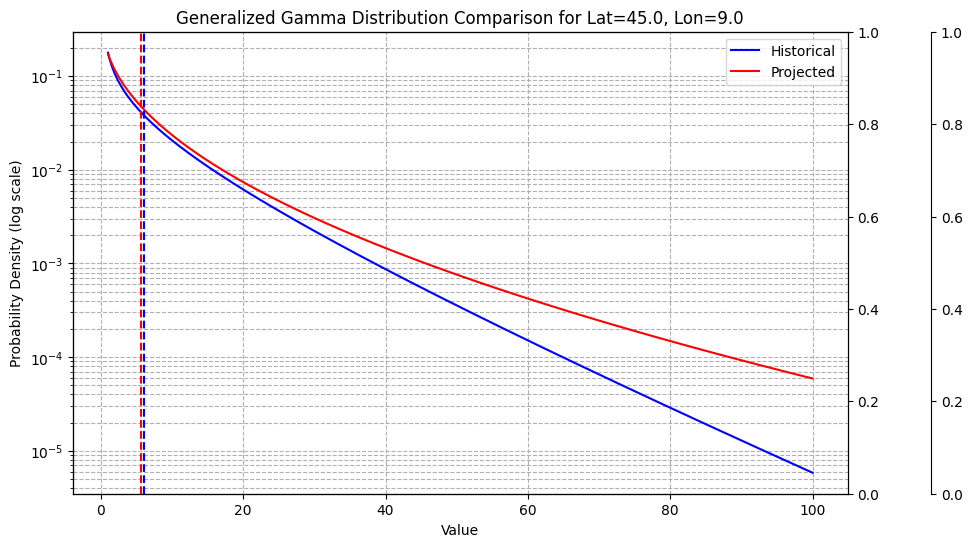

In [12]:
lat = 45.
lon =9.
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'

plot_gengamma_comparison(lat, lon, file_his, file_proj)

In [35]:
def calculate_probabilities(file_his, file_proj, X):
    # Carica i dati dai file CSV
    ds_his = pd.read_csv(file_his)
    ds_proj = pd.read_csv(file_proj)

    # Inizializza una lista per memorizzare i risultati
    results = []

    # Itera attraverso tutte le coordinate presenti in file_his
    for index, row in ds_his.iterrows():
        lat = row['lat']
        lon = row['lon']

        # Trova l'elemento più vicino nella proiezione
        params_his = find_nearest(ds_his, lat, lon)
        params_proj = find_nearest(ds_proj, lat, lon)

        # Calcola la probabilità di eventi oltre X per his e proj
        P_his = 1 - gengamma.cdf(X, params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
        P_proj = 1 - gengamma.cdf(X, params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])

        # Calcola il tempo di ritorno per his e proj
        T_his = 1 / P_his if P_his != 0 else np.inf
        T_proj = 1 / P_proj if P_proj != 0 else np.inf

        # Calcola il rapporto tra (1-Pproj(X))/(1-Phis(X))
        ratio = (1 - P_proj) / (1 - P_his) if (1 - P_his) != 0 else np.inf

        # Memorizza i risultati
        results.append({
            'lat': lat,
            'lon': lon,
            'P_his': P_his,
            'P_proj': P_proj,
            'T_his': T_his,
            'T_proj': T_proj,
            'ratio': ratio
        })

    # Converti i risultati in un DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [38]:
# Esegui il calcolo per un valore fissato X (ad esempio, X = 80)
X = 40
file_his = 'pr_stat_hist.csv'
file_proj = 'pr_stat_proj.csv'
results_df = calculate_probabilities(file_his, file_proj, X)

# Stampa i risultati
print(results_df)

         lat       lon     P_his    P_proj       T_his      T_proj     ratio
0     44.655   7.84100  0.028625  0.035148   34.933893   28.451262  0.993285
1     44.655   7.90405  0.053636  0.030313   18.644246   32.988681  1.024644
2     44.655   7.96710  0.069007  0.033794   14.491258   29.591468  1.037824
3     44.655   8.03015  0.074374  0.030381   13.445590   32.915588  1.047528
4     44.655   8.09320  0.010275  0.024921   97.321322   40.127344  0.985203
...      ...       ...       ...       ...         ...         ...       ...
2457  46.635  11.24570  0.001603  0.020959  623.928398   47.711096  0.980612
2458  46.635  11.30875  0.011525  0.018328   86.766721   54.561023  0.993118
2459  46.635  11.37180  0.023003  0.018282   43.471781   54.697673  1.004832
2460  46.635  11.43485  0.014181  0.012339   70.515409   81.044634  1.001869
2461  46.635  11.49790  0.003310  0.006760  302.087446  147.920449  0.996538

[2462 rows x 7 columns]


In [39]:
results_df.to_csv('results_pr_40.csv')

# Funzioni di confronto sul punto

In [24]:
def find_nearest(ds, lat, lon):
    """Trova la posizione più vicina nei dati NetCDF."""
    lat_nearest = ds['lat'].sel(lat=lat, method='nearest').values
    lon_nearest = ds['lon'].sel(lon=lon, method='nearest').values
    
    # Estrai i parametri per la latitudine e longitudine più vicine
    params = {
        'a': ds['a'].sel(lat=lat_nearest, lon=lon_nearest).values.item(),
        'c': ds['c'].sel(lat=lat_nearest, lon=lon_nearest).values.item(),
        'loc': ds['loc'].sel(lat=lat_nearest, lon=lon_nearest).values.item(),
        'scale': ds['scale'].sel(lat=lat_nearest, lon=lon_nearest).values.item(),
        'mean': ds['mean'].sel(lat=lat_nearest, lon=lon_nearest).values.item(),
        'num_elements': ds['num_elements'].sel(lat=lat_nearest, lon=lon_nearest).values.item()
    }
    
    return params

def plot_gengamma_comparison(lat, lon, file_his, file_proj):
    """Plotta la distribuzione Generalized Gamma per storico e proiezione."""
    # Leggi i file NetCDF
    ds_his = xr.open_dataset(file_his)
    ds_proj = xr.open_dataset(file_proj)
    
    # Trova i parametri per la posizione più vicina
    params_his = find_nearest(ds_his, lat, lon)
    params_proj = find_nearest(ds_proj, lat, lon)
    
    # Crea le distribuzioni gengamma con i parametri estratti
    dist_his = gengamma(params_his['a'], params_his['c'], loc=params_his['loc'], scale=params_his['scale'])
    dist_proj = gengamma(params_proj['a'], params_proj['c'], loc=params_proj['loc'], scale=params_proj['scale'])
    
    # Genera i valori x per il grafico
    x = np.linspace(1, 100, 1000)
    
    # Calcola le densità di probabilità
    pdf_his = dist_his.pdf(x)
    pdf_proj = dist_proj.pdf(x)

    # Calcola P_80 per entrambi i dataset
    P_80_his = 1 - dist_his.cdf(80)
    P_80_proj = 1 - dist_proj.cdf(80)

    # Calcola i tempi di ritorno
    TR_his = 1 / (P_80_his * params_his['num_elements'])
    TR_proj = 1 / (P_80_proj * params_proj['num_elements'])  # Corretta la formula!

    print(f"Tempo di ritorno storico: {TR_his:.4f}, proiezione: {TR_proj:.4f}")

    # Plotta le distribuzioni
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Asse principale per le distribuzioni gengamma
    ax1.plot(x, pdf_his, label='Historical', color='blue')
    ax1.plot(x, pdf_proj, label='Projected', color='red')
    ax1.set_yscale('log')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Probability Density (log scale)')
    ax1.legend(loc='upper right')
    ax1.grid(True, which="both", ls="--")
    
    # Crea un secondo asse per il mean di ds_his
    ax2 = ax1.twinx()
    ax2.axvline(params_his['mean'], color='blue', linestyle='--', label='Mean Historical')
    
    # Crea un terzo asse per il mean di ds_proj
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))  # Sposta il terzo asse a destra
    ax3.axvline(params_proj['mean'], color='red', linestyle='--', label='Mean Projected')

    # Titolo del grafico
    plt.title(f'Generalized Gamma Distribution Comparison for Lat={lat}, Lon={lon}')
    
    plt.show()

Tempo di ritorno storico: 1265.7379, proiezione: 0.0751


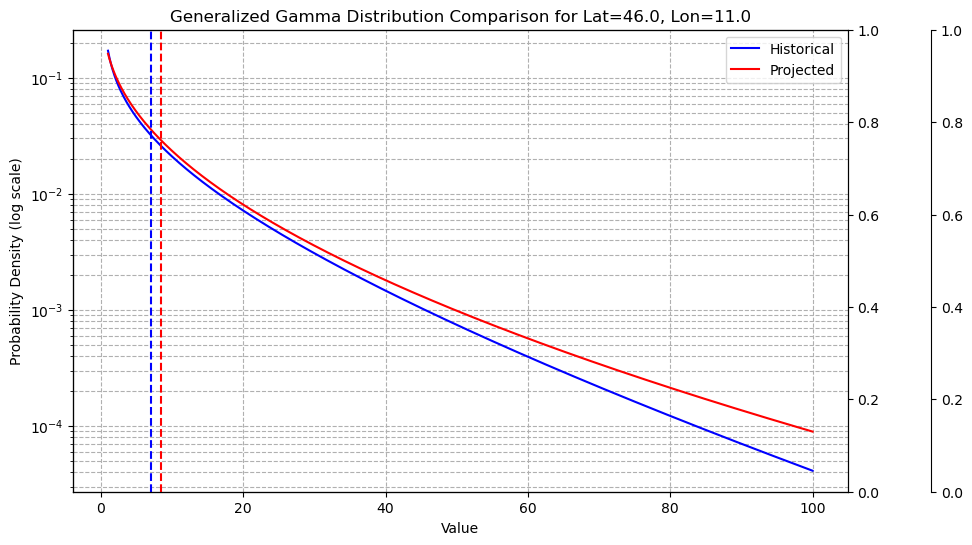

In [26]:
plot_gengamma_comparison(lat=46.0, lon=11.0, file_his="gengamma_fit_his.nc", file_proj="gengamma_fit_proj.nc")